# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [197]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [314]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

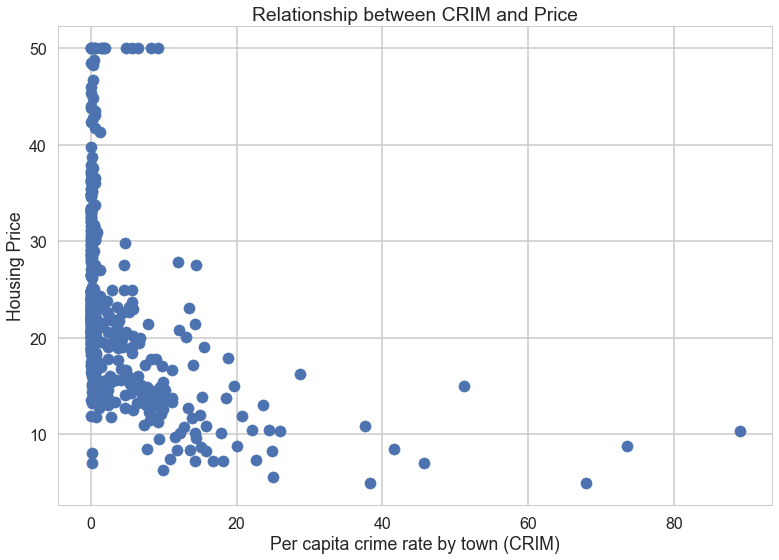

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship


The relationship between housing price and per capita crime rate is overall negative, it appears. In terms of how data relate to each other, the relationship is somewhat linear, except that there are many 0 values for crime rate. It is hard to describe the relationship as simply linear with that fact. It is hard to know if those 0 values are valid or if they represent missing data.

In [ ]:
# your turn: scatter plot between *RM* and *PRICE*


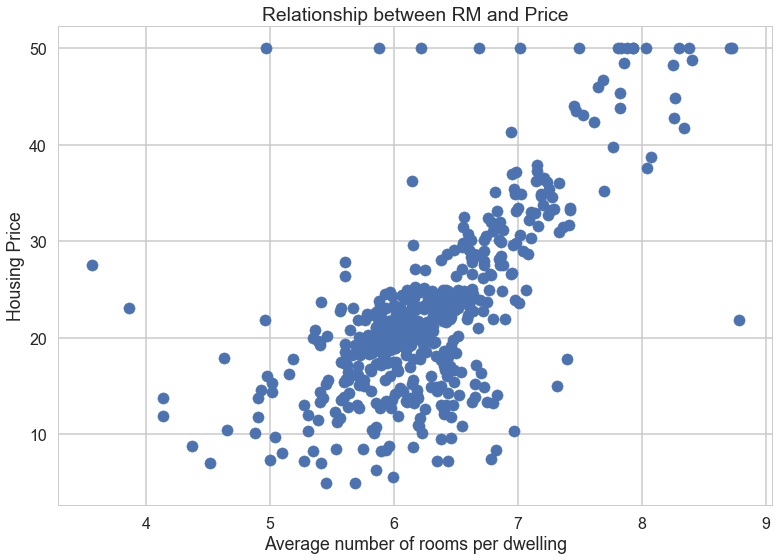

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

There seems to be a positive and mostly linear relationship between housing prices and numbers of rooms per home.

In [ ]:
# your turn: scatter plot between *PTRATIO* and *PRICE*


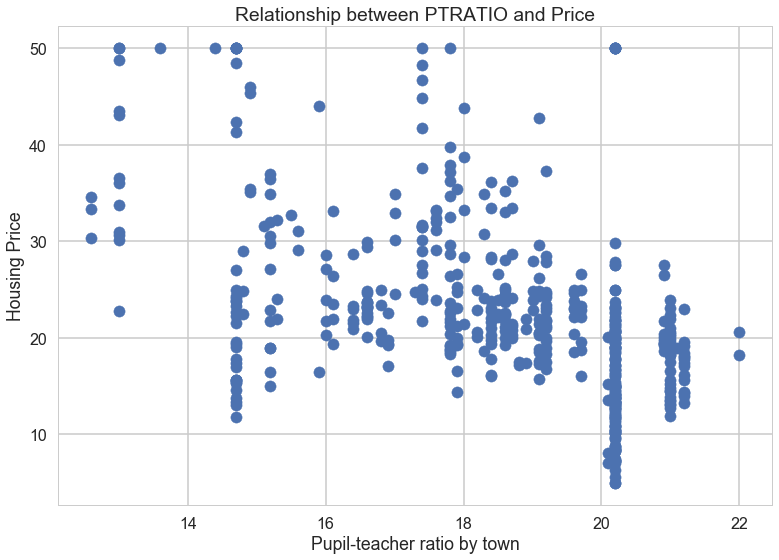

In [14]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [ ]:
# your turn: create some other scatter plots


        For reference:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

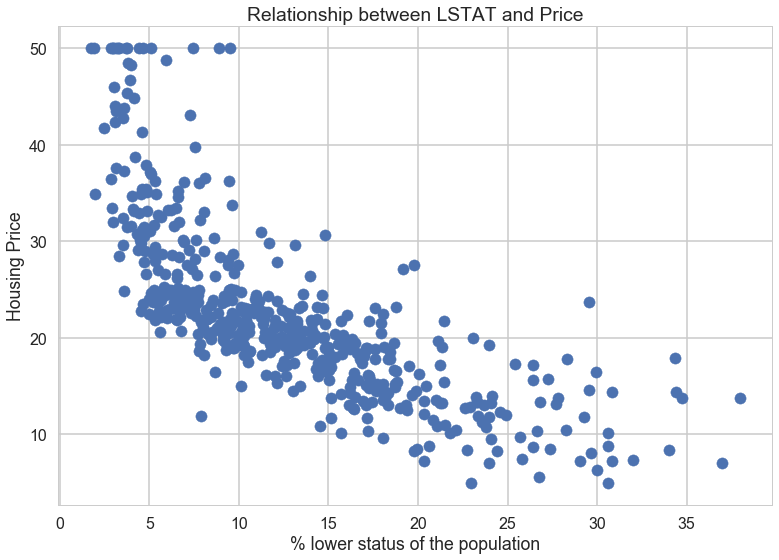

In [15]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

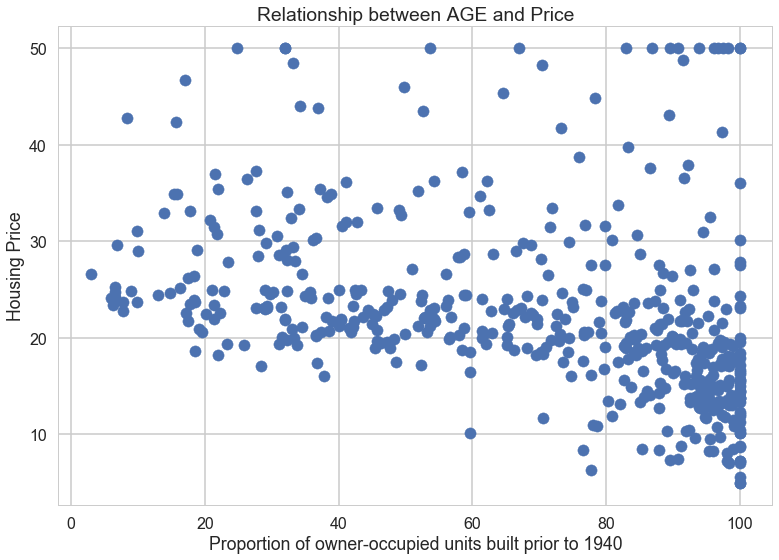

In [16]:
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

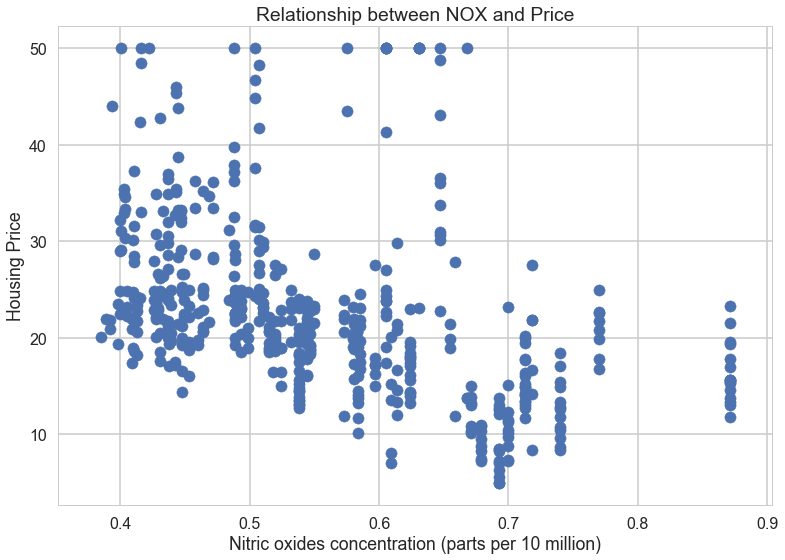

In [17]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

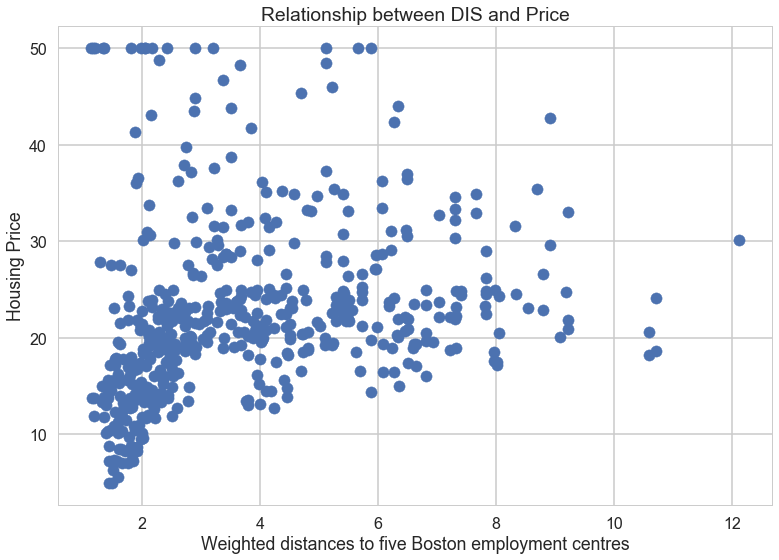

In [18]:
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

There does not appear to be a strong relationship between pupil-teacher ratio and housing prices. There does seem to be a strong negative relationship, though not entirely linear, between "lower status" of population and housing prices. Housing prices look like they average a little higher with newer homes, though there is a very broad range of prices for older homes.


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

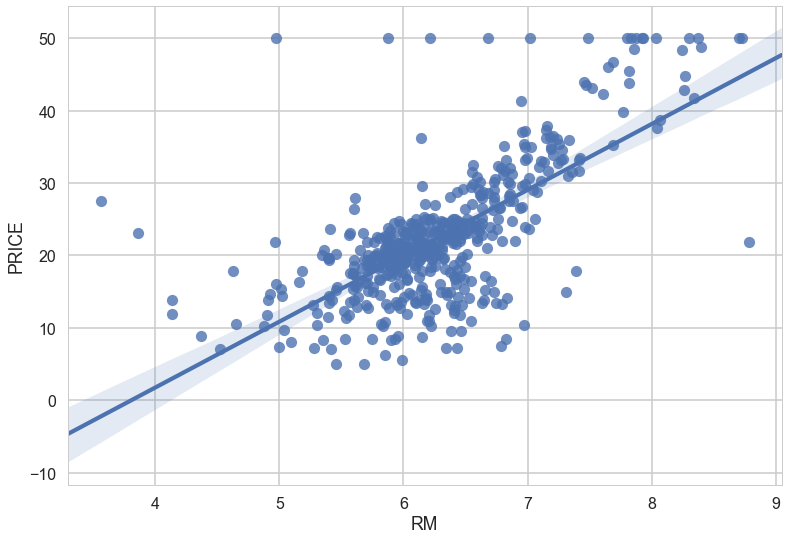

In [19]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


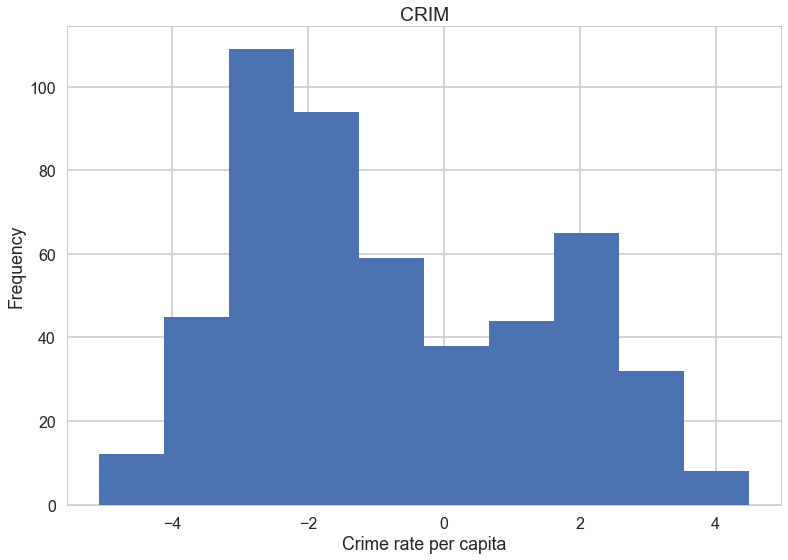

In [40]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot histograms for *RM* and *PTRATIO*, along with the two variables you picked in the previous section.</p>
</div>

In [ ]:
#your turn


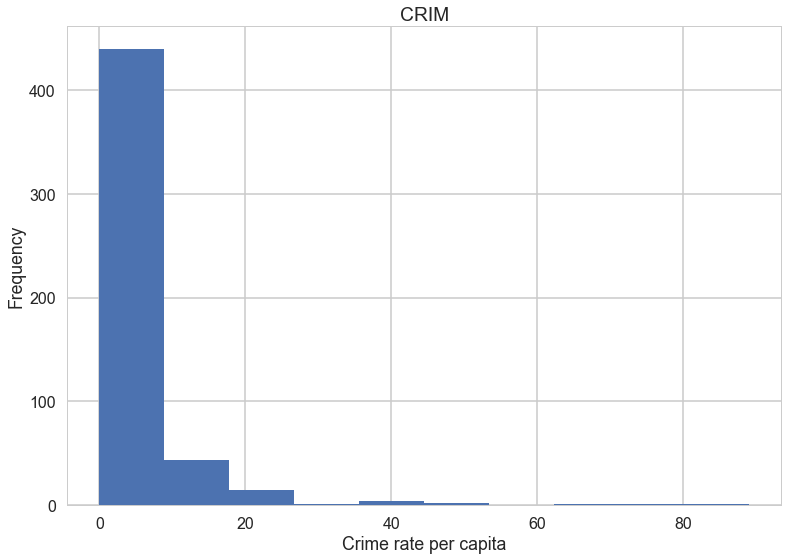

In [52]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

The log transformation of the crime data clearly shows patterns for less-frequent data points with more resolution. Since the 0 bin (or so) for the non-transformed data is so prominent, the other frequencies are difficult to view. That bin may also be an artifact or represent missing data. In the log-transformed histogram we see better a second peak to the right of the data relating to the 0 bin. 

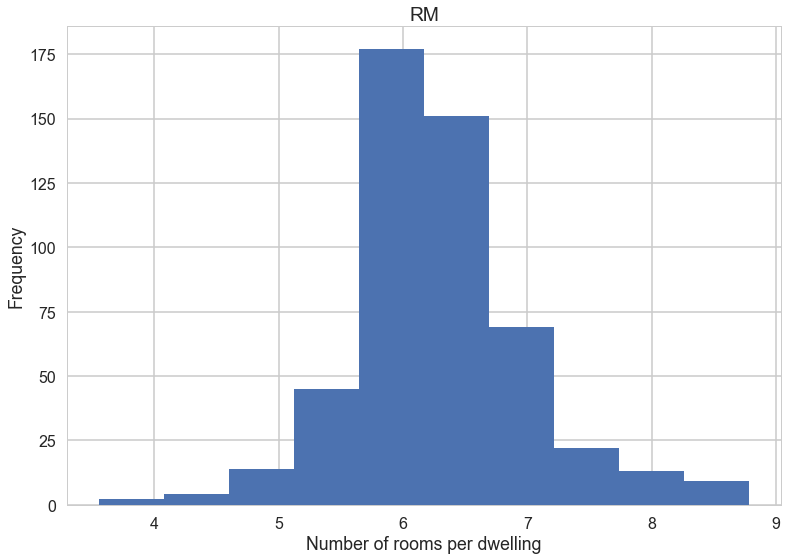

In [53]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Number of rooms per dwelling")
plt.ylabel("Frequency")
plt.show()

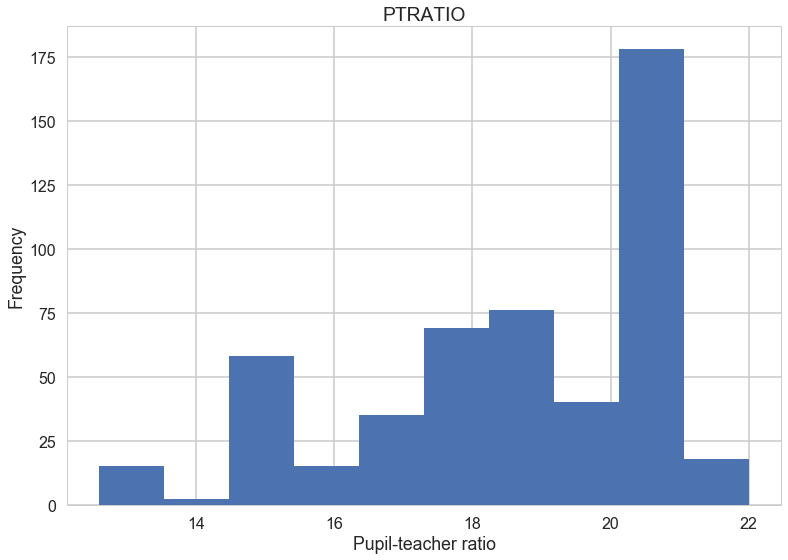

In [54]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-teacher ratio")
plt.ylabel("Frequency")
plt.show()

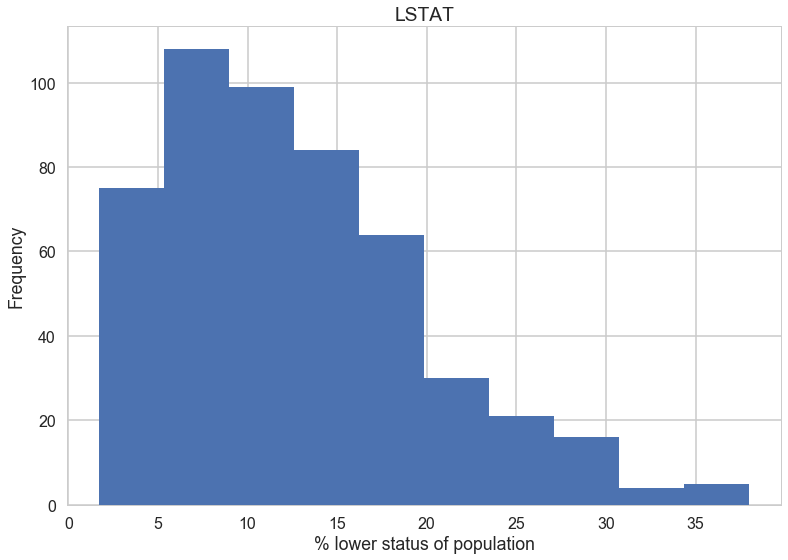

In [55]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of population")
plt.ylabel("Frequency")
plt.show()

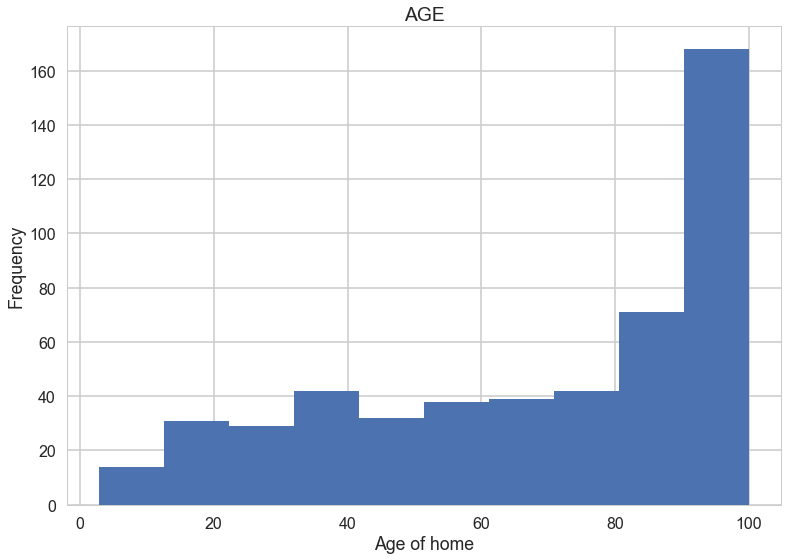

In [56]:
plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("Age of home")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [21]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/vickimoore/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.49e-74
Time:                        18:59:27   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [ ]:
# your turn

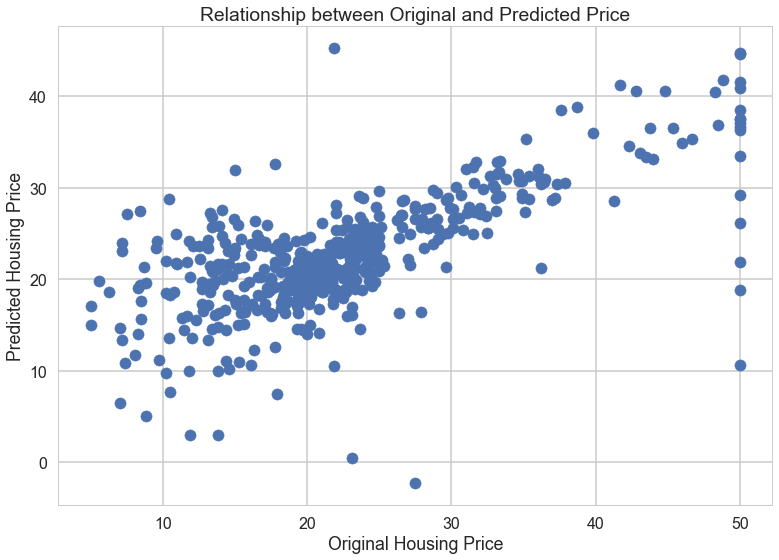

In [23]:
plt.scatter(bos.PRICE, m.fittedvalues)
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted Housing Price")
plt.title("Relationship between Original and Predicted Price")

Aside from outliers or missing data in the x=50 area, the plot looks like there is a strong correlation between original housing prices and predicted housing prices. There may be heteroscedasticity, though, with greater variance with the lower numbers.

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [ ]:
# your turn


For the first question, I would choose to not fit an intercept by setting this argument when instantiating the linear regression object as such: lm = LinearRegression(fit_intercept=False). This might serve a purpose if the data pass through the origin. However, y would not otherwise relate to x in an accurate fashion. I suspect a reason to do so, if data were centered on the origin, would be if there was a tremendous amount of data points and removing that portion of the calculation would hasten computation substantially. 

For residuals to be i.i.d. residuals should be normally distributed, but in most cases also a plot should not show heteroscedasticity or any peaks; variance should be constant. However, variations on linear regression can usually compensate for aberrations to these principles, and no dataset will be "perfect".

Y does not need to be normally distributed for linear regression to work, but a different distribution could require use of a different estimator. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [33]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [34]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [35]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [36]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [ ]:
# your turn


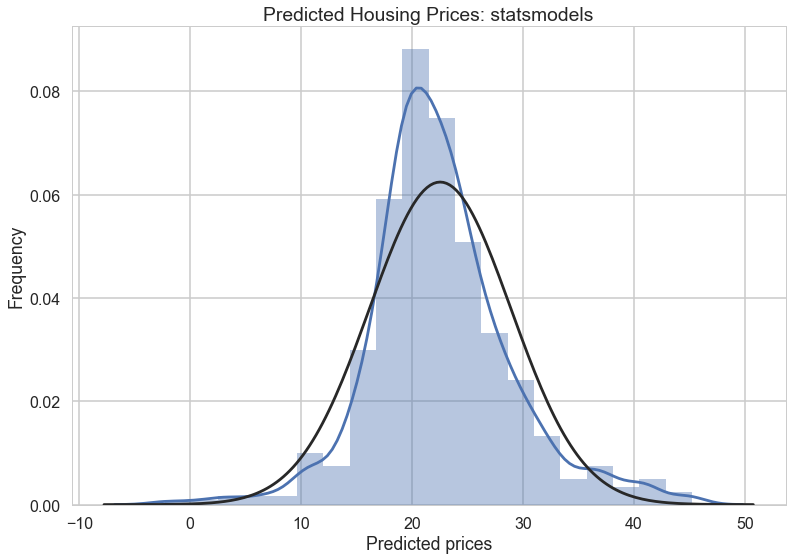

In [46]:
from scipy.stats import norm
sns.distplot(m.fittedvalues, hist=True, bins=20, fit=norm)
plt.title("Predicted Housing Prices: statsmodels")
plt.xlabel("Predicted prices")
plt.ylabel("Frequency")
plt.show()

From statsmodels calculation: The shape of this histogram resembles a normal distribution, but not completely. The second histogram shows the shape of a normal curve overlaying data from the distribution of the predicted price values. The mean (or at least the mode) appears to be about in the middle of the spread, but the frequencies of the center values are quite high. It is a tall and narrow histogram compared to that of a normal distribution. The tail on the left looks right for a normal distribution, but with a dearth of data points between the mean and the tail. There is also asymmetry with the right side showing higher frequencies than expected in the tail. There are possibly some outliers in that far right tail. They do not look egregious, but if they disturb the predictive utility of a linear regression on these data, then it could be considered to recalculate without some obvious outliers. These do not look especially egregious, however.

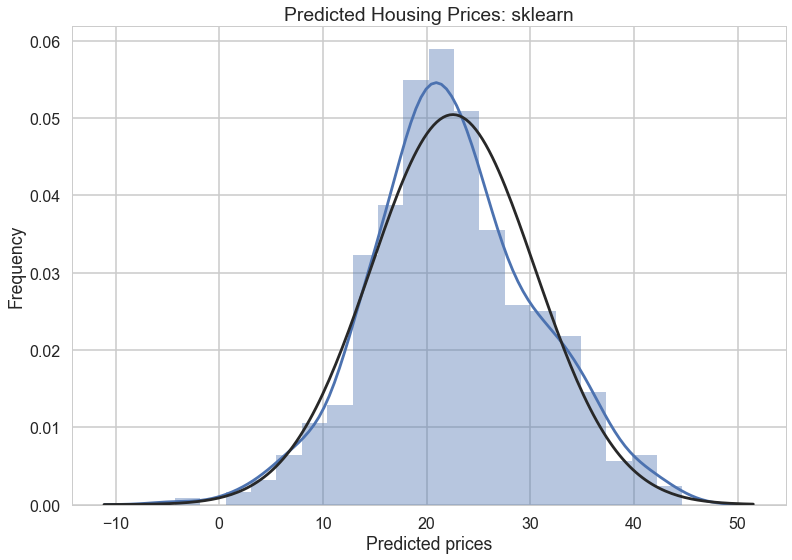

In [47]:
lm.predict(X)
sns.distplot(lm.predict(X), hist=True, bins=20, fit=norm)
plt.title("Predicted Housing Prices: sklearn")
plt.xlabel("Predicted prices")
plt.ylabel("Frequency")
plt.show()

From sklearn: The histogram of predicted values generated using sklearn resembles a normal distribution more than that derived by statsmodels does, though it has a slight skew leftward, and the mean is still slightly more frequent than expected (shows kurtosis). While still fitting within the bounds of the normal curve, there are possibly outliers on the left side that may need to be reconsidered in computing regression. 

Statsmodels provides an output of multiple statistics and other values involved in calculations. An advantage to statsmodels over sklearn is that statsmodels is particularly geared toward an extensive amount of statistical analyses and conveniently provides a wealth of statistical information. Sklearn is specifically geared toward machine learning, and while it is capable of handling statistical analyses, it is more streamlined for machine learning analyses. Linear regression works well for both because it is analysis that applies in both statistical and predictive realms. 

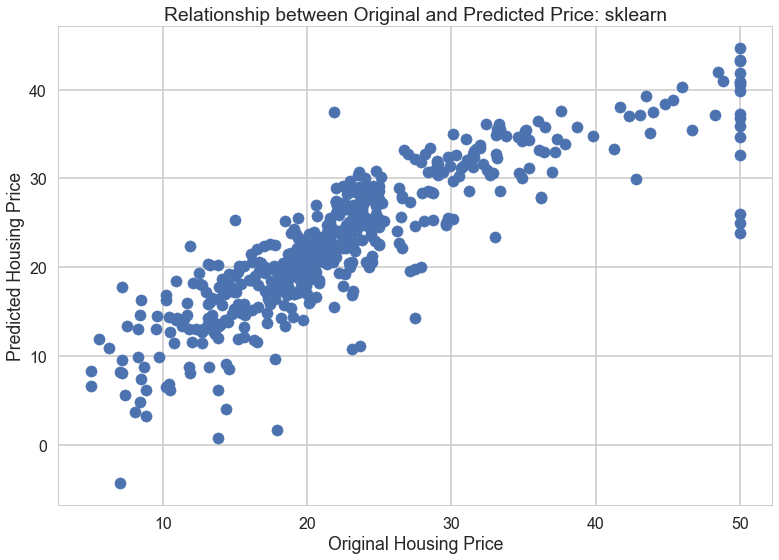

In [49]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Original Housing Price")
plt.ylabel("Predicted Housing Price")
plt.title("Relationship between Original and Predicted Price: sklearn")

Sklearn, like statsmodels, does a pretty good job of predicting housing prices. The pattern looks well-correlated with the original prices here, and the fit looks slightly tighter here, but it looks slightly less like a direct, linear relationship here. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [50]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [51]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.69056631064e-23


In [88]:
lm.score(X, bos.PRICE)

0.7406077428649428

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Make a scatterplot of `PTRATIO` and housing price. Tell a story about the relationship between the variables.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [ ]:
# your turn


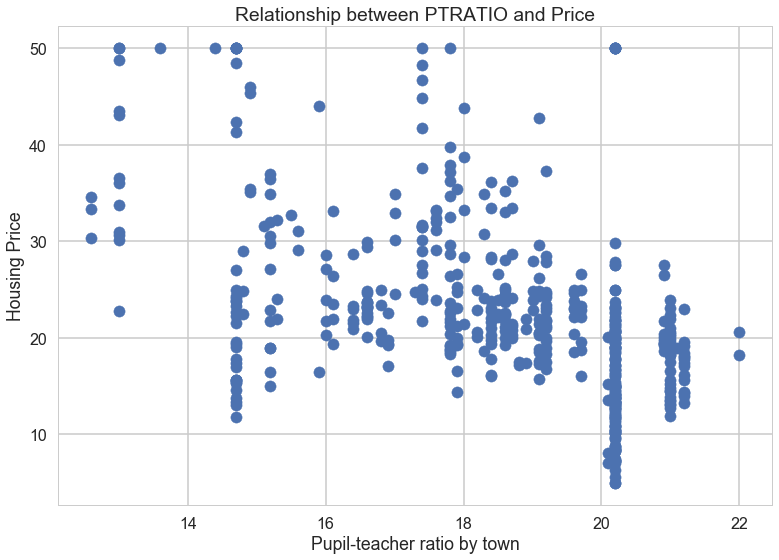

In [57]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Overall, there seems to be a trend of higher pupil-teacher ratio by town as housing prices go down. It is a little complicated by the fact that there are broad ranges of y-values that have the same x-values for pupil-teacher ratio. There is probably something obscured in the pupil-teacher ratio calculation. 

In [60]:
PT = bos.drop('PTRATIO', axis = 1)
lmpt = LinearRegression()
lmpt.fit(PT, bos.PTRATIO)
lmpt.predict(PT)

array([ 17.10435813,  18.80496044,  17.47006733,  17.46519033,
        17.14179579,  17.99249202,  18.03305693,  17.5439302 ,
        18.26665402,  18.36680622,  18.68652479,  18.51446527,
        17.83608325,  18.48470145,  18.76572737,  18.50055386,
        18.02099569,  18.67105446,  18.07621074,  18.67619489,
        18.96469982,  18.5575364 ,  18.82952287,  18.9381245 ,
        18.90710918,  18.88914232,  18.80908701,  18.76132742,
        18.70279357,  18.39307061,  18.92431645,  19.14193257,
        18.37584683,  19.05855633,  18.74661643,  19.05414819,
        18.8025354 ,  18.6744207 ,  18.15026987,  16.07769174,
        15.67310375,  18.17037636,  18.33272505,  18.34604483,
        18.86812827,  19.04522763,  18.81371624,  19.32397919,
        19.21336464,  18.99510099,  18.53656496,  18.71854966,
        18.08965282,  18.17311391,  17.49456575,  15.48115952,
        16.41948598,  15.76574276,  18.47953649,  18.94411027,
        19.02784021,  19.41673015,  18.87643338,  18.26

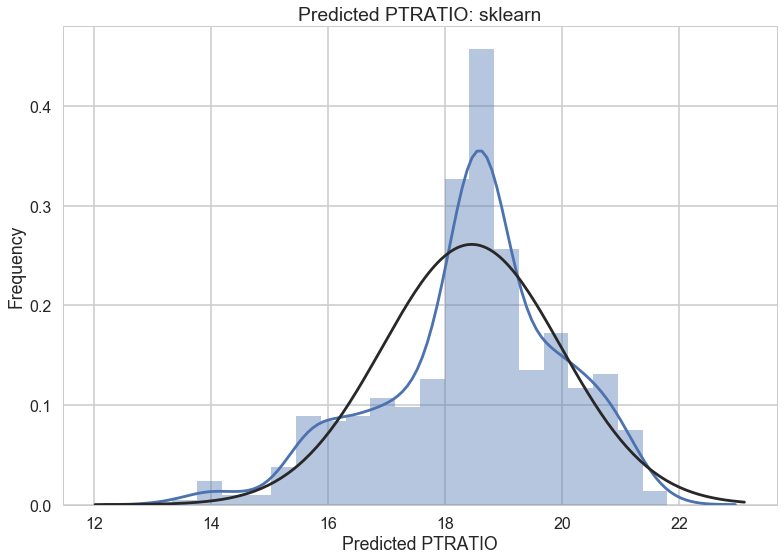

In [61]:
sns.distplot(lmpt.predict(PT), hist=True, bins=20, fit=norm)
plt.title("Predicted PTRATIO: sklearn")
plt.xlabel("Predicted PTRATIO")
plt.ylabel("Frequency")
plt.show()

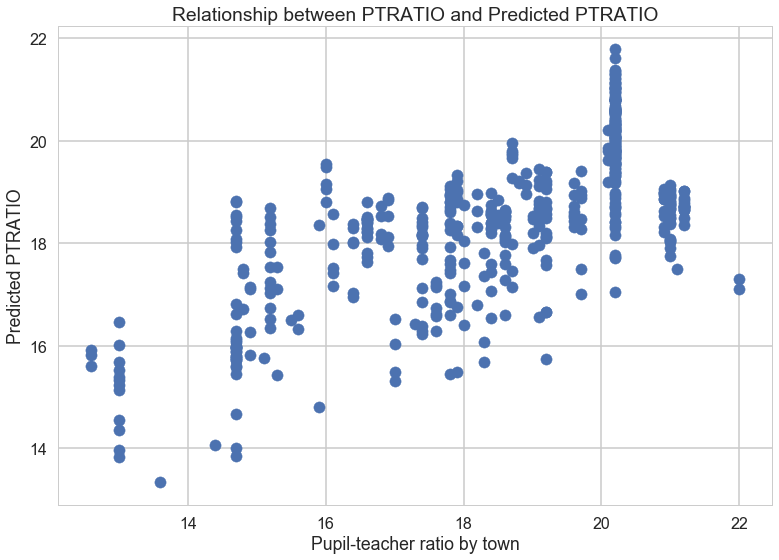

In [344]:
plt.scatter(bos.PTRATIO, lmpt.predict(PT))
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Predicted PTRATIO")
plt.title("Relationship between PTRATIO and Predicted PTRATIO")
plt.show()

In [63]:
print('Estimated intercept coefficient: {}'.format(lmpt.intercept_))

Estimated intercept coefficient: 24.84937918587317


In [64]:
print('Number of coefficients: {}'.format(len(lmpt.coef_)))

Number of coefficients: 13


In [65]:
pd.DataFrame({'features': PT.columns, 'estimatedCoefficients': lmpt.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.016068
1,ZN,-0.024714
2,INDUS,0.057229
3,CHAS,-0.282437
4,NOX,-10.507930
5,RM,-0.071413
6,AGE,0.007206
7,DIS,-0.022276
8,RAD,0.117899
9,TAX,0.000698


In [111]:
print("R^2:",lmpt.score(PT, bos.PTRATIO))

R^2: 0.49834893334


The computed R^2 value of 0.498 is the coefficient of determination for this model. This means that 49.8% of the variance in pupil-teacher ratios by town can be explained by the model, the features collectively as independent variables against the target.

In [119]:
sklearn.feature_selection.f_regression(PT, bos.PTRATIO, center=True)

(array([  45.67116309,   91.33096447,   86.77178568,    7.55356798,
          18.65651516,   72.9107361 ,   36.9989747 ,   28.79352221,
         138.84432123,  135.90697575,   16.37346572,   81.98460908,
         175.10554288]),
 array([  3.87512189e-11,   5.32507418e-20,   3.77484333e-19,
          6.20391597e-03,   1.88569175e-05,   1.61081989e-16,
          2.33888487e-09,   1.22991985e-07,   1.77855387e-28,
          5.68683264e-28,   6.01731993e-05,   3.00352432e-18,
          1.60950948e-34]))

The F-test for linear regression analyses tests whether the independent variable in question is significant. It looks as though this sklearn test produced F-statistics for each feature against pupil-teacher ratio, and each p-value (all of which appear highly statistically significant). I will try statsmodels next and get a summary of statistics for the model with features treated collectively.

In [118]:
ptols = ols('PTRATIO ~ PT',bos).fit()
print(ptols.summary())

                            OLS Regression Results                            
Dep. Variable:                PTRATIO   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     37.60
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.33e-65
Time:                        17:50:19   Log-Likelihood:                -933.78
No. Observations:                 506   AIC:                             1896.
Df Residuals:                     492   BIC:                             1955.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8494      1.352     18.384      0.0

The F-statistic in the summary output table is 37.60 between the features of this dataset and PTRATIO, and the p-value is 2.33e-65, which is strongly significant. The next question is about the F-statistic versus the t-statistic for the coefficient. I have interpreted the question as relating to PTRATIO versus the dataset subtracting PTRATIO, so there are multiple coefficients here. Either way, none are the same for t- and F-statistic values. It looks like the F-statistic relates to the model with features treated collectively, while the t-statistics are computed for the relationships between each independent variable and the target.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [ ]:
# your turn

In [133]:
three = bos[['CRIM', 'RM', 'PTRATIO']]
threeols = ols('PRICE ~ three',bos).fit()
print(threeols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 10 May 2018   Prob (F-statistic):           1.09e-97
Time:                        18:08:41   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

The F-statistic for the linear regression analysis of independent variables 'CRIM', 'RM', and 'PTRATIO' against 'PRICE', with a p-value of 1.09e-97, so strongly significant. the R^2 value is 0.593, so 59% of the variance in housing price is described by this model. All three independent variables here appear to contribute to the model with p-values for t-statistics around 0. Below is also each variable separately tested against price, and for each te F-statistics and p-values suggest significance. R^2 values go down, with that for 'CRIM' being 0.149, for 'RM' being .484 (as in exercises up above), and for 'PTRATIO' being 0.258. 

In the list of coefficients above, all of which show p-values around 0, so we have some confidence these are statistically significant, each variable affects price differently. The 0-index variable, 'CRIM', is associated with a lower housing price by on average about $ 202for each unit of which crime rate is measured (per capita), and each unit of a higher pupil-teacher ratio relates on average to a lower housing price by about $1,074. Number of rooms, however, raises housing price by about $7,382 per room on average in this analysis. When looking at the individual analyses below, we can see that these effects change. The model above is looking collectively at these variables.

In [134]:
prcrimols = ols('PRICE ~ CRIM',bos).fit()
print(prcrimols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.08e-19
Time:                        18:15:05   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0162      0.409     58.676      0.0

In [136]:
prrmols = ols('PRICE ~ RM',bos).fit()
print(prrmols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.49e-74
Time:                        18:15:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [137]:
prratiools = ols('PRICE ~ PTRATIO',bos).fit()
print(prratiools.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 10 May 2018   Prob (F-statistic):           1.61e-34
Time:                        18:16:08   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [145]:
four = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT']]
fourols = ols('PRICE ~ four',bos).fit()
print(fourols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Thu, 10 May 2018   Prob (F-statistic):          6.39e-123
Time:                        23:05:20   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

In [143]:
five = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT', 'NOX']]
fiveols = ols('PRICE ~ five',bos).fit()
print(fiveols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 10 May 2018   Prob (F-statistic):          9.68e-122
Time:                        23:02:09   Log-Likelihood:                -1550.7
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5508      4.112      4.268      0.0

In [183]:
F43a = statsmodels.regression.linear_model.OLSResults.compare_f_test(fourols,threeols)
print('Nested F-stat (3 vs. 4 variables):',F43a[0], ', p:',F43a[1], ', df-diff:',F43a[2])
F54a = statsmodels.regression.linear_model.OLSResults.compare_f_test(fiveols,fourols)
print('Nested F-stat (4 vs. 5 variables):',F54a[0], ', p:',F54a[1], ', df-diff:',F54a[2])

Nested F-stat (3 vs. 4 variables): 138.312972673 , p: 2.28702439405e-28 , df-diff: 1.0
Nested F-stat (4 vs. 5 variables): 0.281382516286 , p: 0.596031998735 , df-diff: 1.0


The model with 3 independent variables ('CRIM', 'RM', and 'PTRATIO') had an F-statistic of 244, while the model with those 3 variables plus 'LSTAT' had an F-statistic of 268, and the model with all 4 of those variables plus 'NOX' had an F-statistic of 214. The AIC values of each of these models were 3233, 3112, and 3113, respectively. The four-variable model here has the lowest AIC, so it looks like the best of the three models here. Also, the p-values for each coefficient reveal that in these models 'CRIM' starts to drop out of significance once the four-variable model is run. In the five-variable model, 'NOX' appears to not even be marginally significant. Finally, the nested F-statistic results (the manner in which to compare models with variables added or subtracted) suggest that addition of the fourth variable, 'LSTAT', to the model adds predictive value. The addition of the fifth variable, 'NOX', however, did not add anything useful and in fact makes the model worse.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [ ]:
# Your turn.


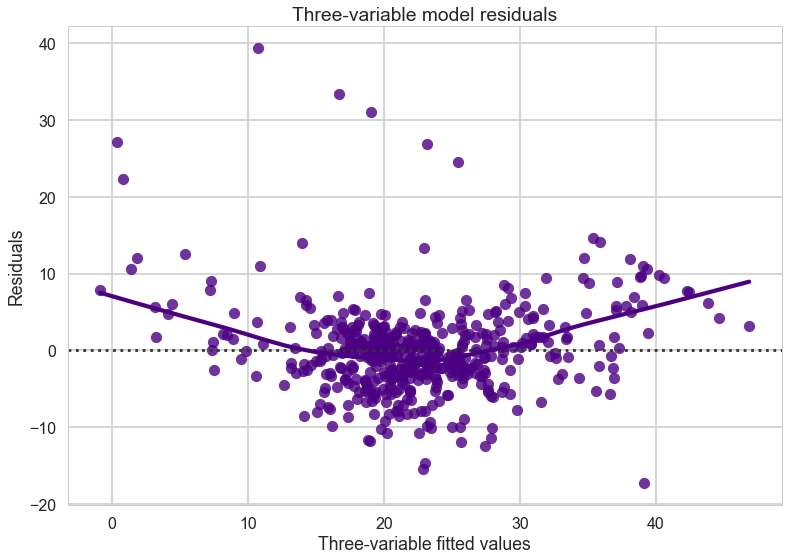

In [286]:
sns.residplot(threeols.fittedvalues, threeols.resid, lowess=True, color="indigo")
plt.xlabel('Three-variable fitted values')
plt.ylabel('Residuals')
plt.title('Three-variable model residuals')
plt.show()

The residual plot shows a valley in the middle, suggesting some non-linear relationship between the model and the predicted variable. Near the central values of the fitted values, where the bulk of the points fall, the residuals are closer to 0. More spread-out fitted values, both smaller and larger than the central values, show higher residuals. A histogram of the residuals, below, shows kurtosis. The central values are higher than expected, but the symmetry is normal.

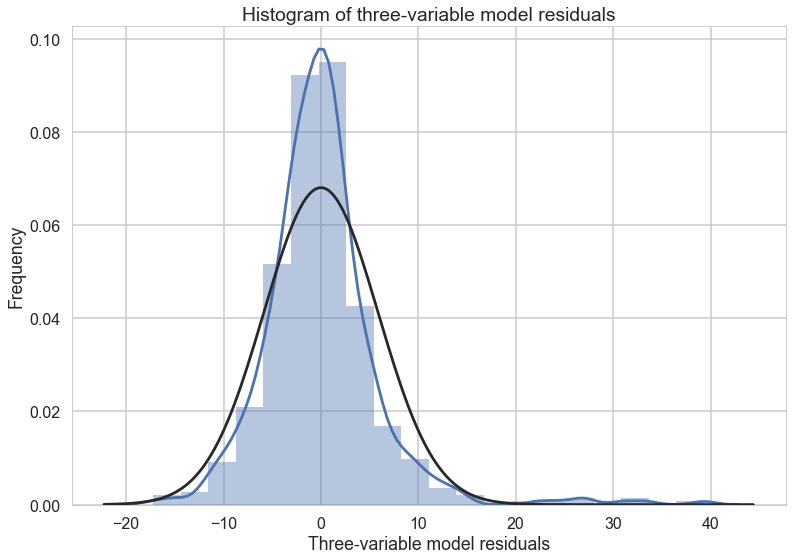

In [201]:
sns.distplot(threeols.resid, hist=True, bins=20, fit=norm)
plt.xlabel('Three-variable model residuals')
plt.ylabel('Frequency')
plt.title('Histogram of three-variable model residuals')
plt.show()

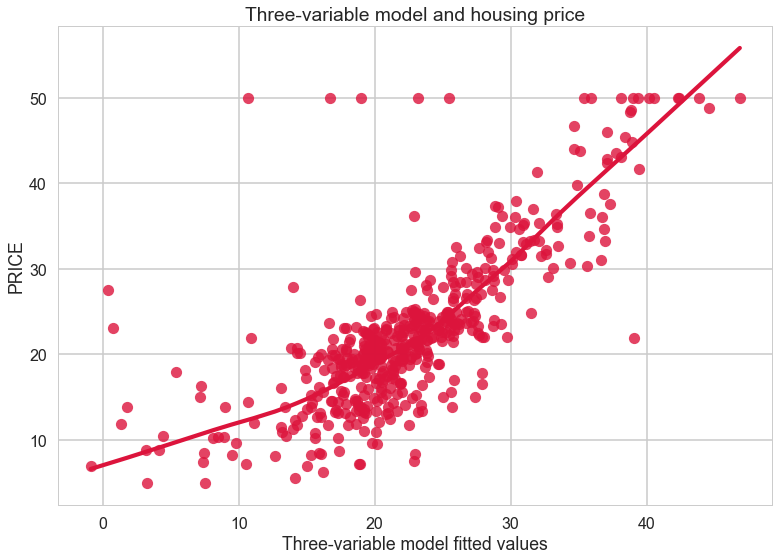

In [279]:
sns.regplot(threeols.fittedvalues, bos.PRICE, lowess=True, color='crimson')
plt.xlabel('Three-variable model fitted values')
plt.title('Three-variable model and housing price')
plt.show()

The model of fitted values against price shows departure from linearity.

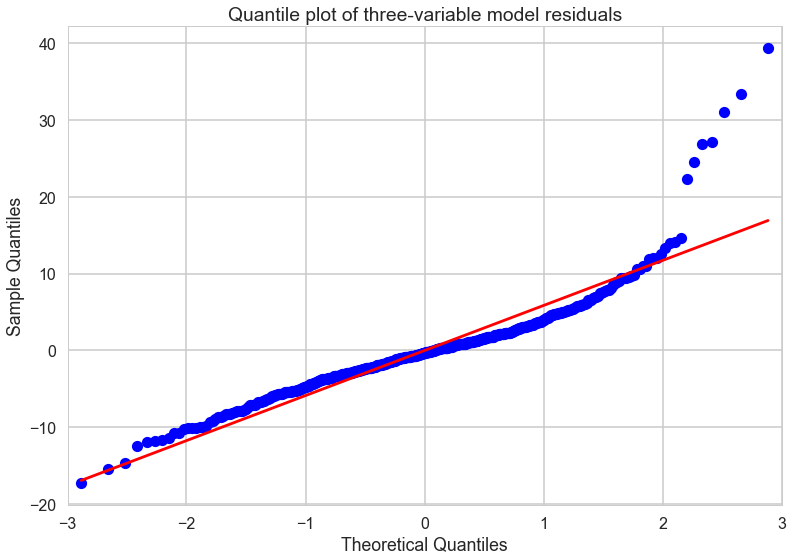

In [283]:
from statsmodels.graphics.gofplots import qqplot
qqplot(threeols.resid, line='s')
plt.title("Quantile plot of three-variable model residuals")
plt.show()

The quantile plot of residuals shows departure from a straight line at one end. The quantile data points show a mostly straight line across the plot in good agreement with the diagonal drawn onto the plot until getting to the higher values. The slight S-shape present in the bulk of the data trend likely represents how clustered toward the mean most of the data are. There is still straightness to the line in the upper right corner of the plot, but it is a different line, steeper, from that which cuts through most of the points. This suggests that for the higher values of residuals are more dispersed than theoretically expected for the larger residuals. These possible outliers represent a relatively small number of points. This plot suggests 7 somewhat obvious outliers seem to be contributing large residuals. A look back at both the fitted values versus price plots and plotted values versus residuals plots gives a clue as to which exact data points these represent. Looking further up the assignment back to the scatter plots for the model's component variables versus price shows that most of these outliers come from the 'RM' versus 'PRICE' relationship; the bulk of the outliers represent housing price data at the '50' level regardless of number of rooms. These points stand out distinctly, perhaps due to an artifact or feature of data reporting. 

The quantile plot, with its diagonal line, gives clarity to the question of how appropriate the residuals are for a model. However, the graph of the fitted values versus residuals provides a more intuitive way of looking at where the errors are greatest with the model. It is easier to see which data points the outliers represent after looking at this plot.

Leverage and outlier status are not synonymous, but an outlier may be masked if it has enough leverage to have moved the regression line to it such that its residual is low. Next we will look at leverage of points.

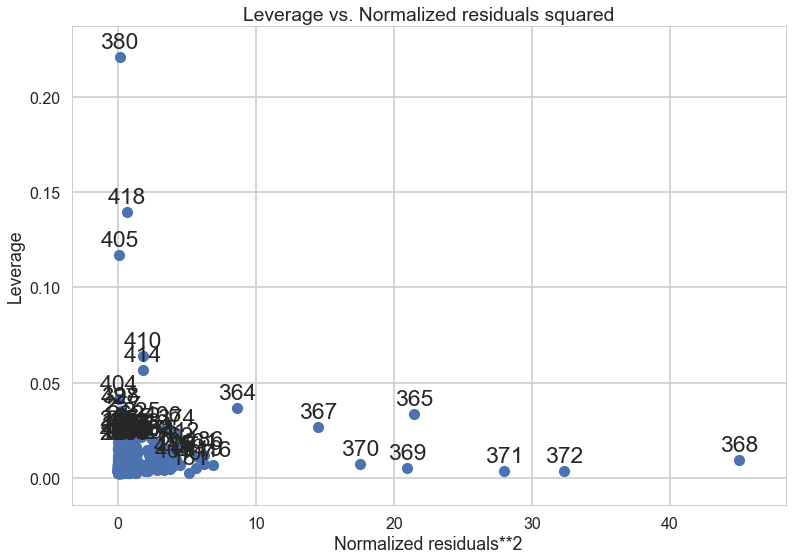

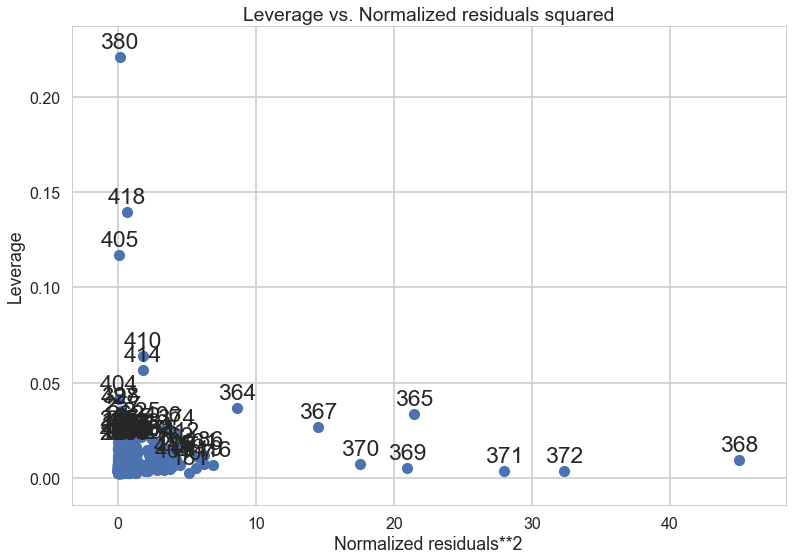

In [301]:
plot_leverage_resid2(threeols)

The highest-leverage points are those marked '380', '418', and '405'. However, these points do not have high residual values, and in fact are very near to the regression line given that they have practially 0 residual values. Leverage is high for points that are far from others and in a way that may exert more influence on regression line calculation. However, high leverage does not necessarily mean high influence because a point far from all others may simply lie along the regression line that is already largely determined by other points; this lack of influence would be confirmed by a lack of effect upon removal of the point. Such points would not necessarily stand out as outliers because they would be very close to the regression line and therefore would seem to be correct. One cannot tell simply from looking at the line-of-best-fit which high-leverage points are exerting high influence and which are not. Residual is high for points that are far from the regression line, and these are the points that visibly stand out as outliers. An influence plot may be able to indicate whether a point is exerting much higher influence over the regression line calculation than others do. 

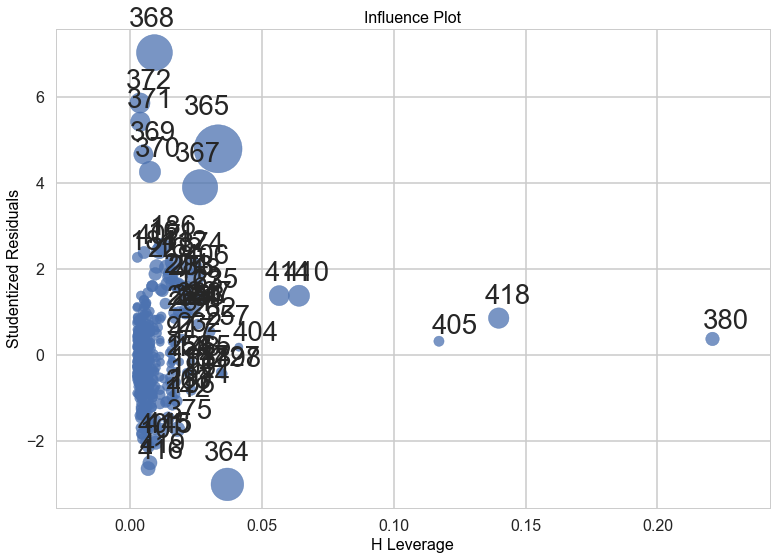

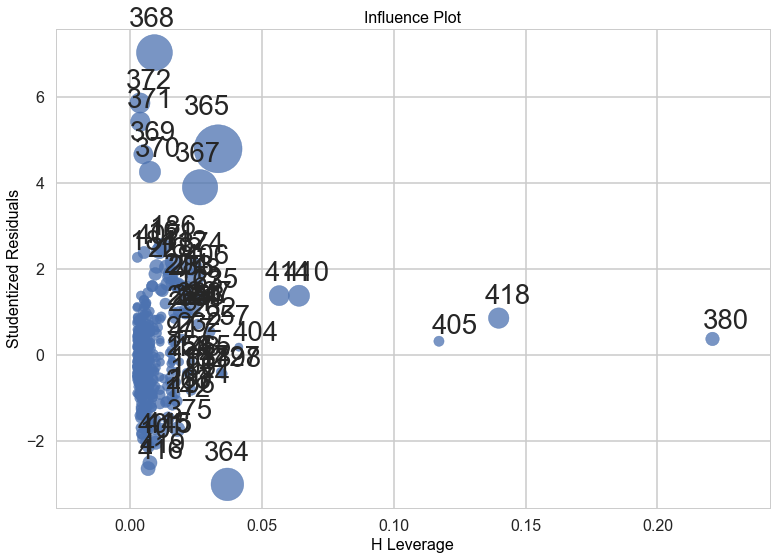

In [303]:
influence_plot(threeols)

The influence plot above uses Cook's distances to determine the size of each point's bubble in this plot of leverage versus residuals. Cook's distance is a measure of how much influence an individual point confers to the regression line calculation in a regression analysis. In this visualization we can see that most points with high leverage or high residual value exert more influence than the bulk of the points do, but even among these some points appear much more influential than others do. The high-leverage point labeled '418' may be exerting undue influence on the regression, but some low-leverage points with high residual value, especially '365', '368', '367', and '364', are apparently exerting very high influence on the regression. High-leverage point '418' is comparable to some high-residual points. Point '405' has high leverage but appears not influential. The question asks what happens to the regression model when outliers and high-leverage points are removed, so that we will look at next.

In [331]:
bosnew = bos.drop(bos.index[[368,372,371,365,369,370,367,380,418,405,414,410,364]])
threenew = bosnew[['CRIM', 'RM', 'PTRATIO']]
threenewols = ols('PRICE ~ threenew',bosnew).fit()
print(threenewols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     441.7
Date:                Fri, 11 May 2018   Prob (F-statistic):          9.41e-139
Time:                        16:29:44   Log-Likelihood:                -1447.2
No. Observations:                 493   AIC:                             2902.
Df Residuals:                     489   BIC:                             2919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.0204      3.270     -2.759      

The original three-variable model showed an R^2 of 0.593, while the three-variable-no-outlier model has an R^2 of 0.73, so that is a considerable increase for this dataset of approximately 500 entries, just with removal of 13 of them. The F-statistic for the version of the model that includes the outliers was 244.2 (p-value = 1.09e-97), while removal the 13 outliers yields an F-statistic of 441.7 (and very low p-value of 9.41e-139). The AIC value, which can be directly compared between the models, was 3233 for the version with the outliers, and dropped to 2902 with the removal of these outliers. Impacts of coefficients changed slightly between versions of the model. Overall, the statistics for the version of the model lacking the outliers show this model to likely have greater predictive power. A drawback to removing these data is that we do not know if these represent meaningful values, so removal of outliers depends on goals. If we want to describe a sample of a population, arguments could be made to include or exclude outliers. If we want to develop a predictive model, removal of these outliers likely makes predictions more accurate. 

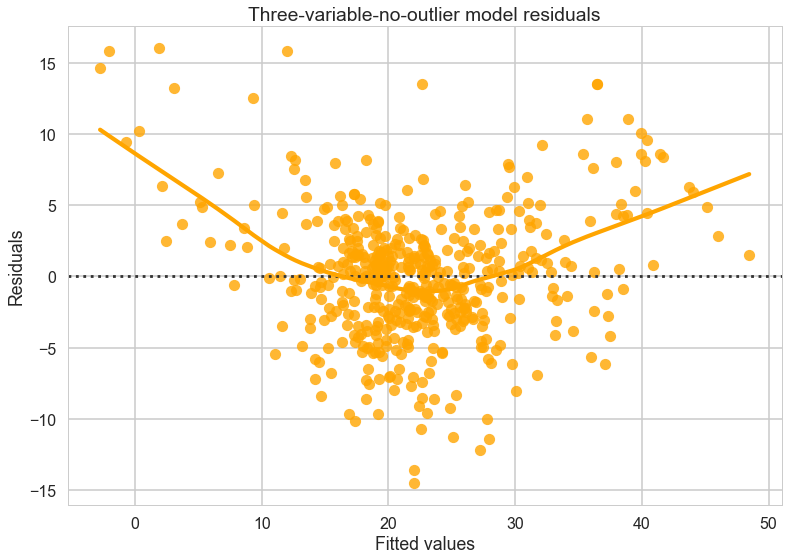

In [339]:
sns.residplot(threenewols.fittedvalues, threenewols.resid, lowess=True, color="orange")
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Three-variable-no-outlier model residuals')
plt.show()

The nature of the residuals plot versus fitted values does not change much with the outliers removed, but the larger residuals are gone. Similarly, the below plot of fitted values against the housing prices does not look obviously different, but more dramatic outliers are now gone.

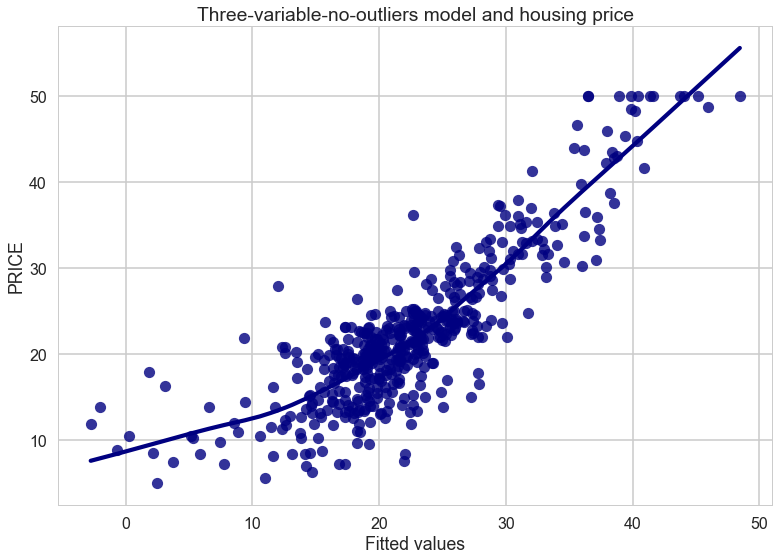

In [340]:
sns.regplot(threenewols.fittedvalues, bosnew.PRICE, lowess=True, color='navy')
plt.xlabel('Fitted values')
plt.title('Three-variable-no-outliers model and housing price')
plt.show()

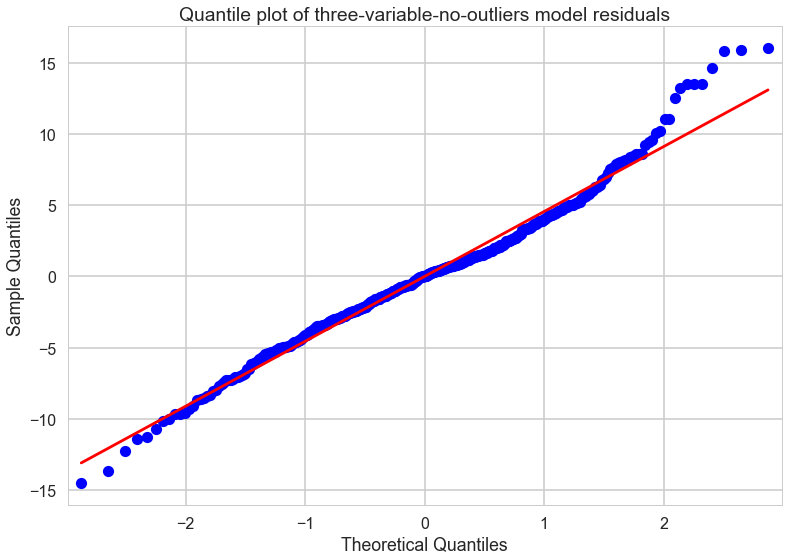

In [341]:
qqplot(threenewols.resid, line='s')
plt.title("Quantile plot of three-variable-no-outliers model residuals")
plt.show()

The quantile plot for the residuals of the model without outliers has not changed for most data points, but it no longer has the small population of very high residuals in the upper right. The scale of the y-axis has changed, so some departure from the diagonal line looks inflated, but overall the remaining, unremoved, data look as they did before.

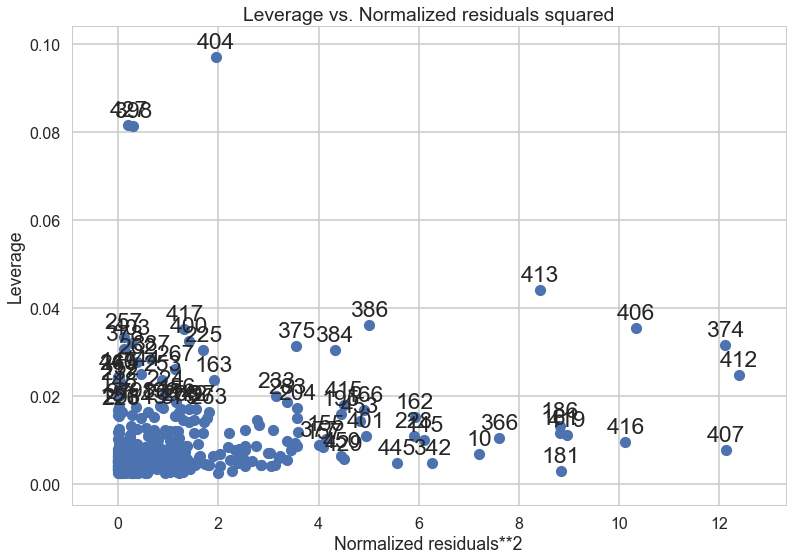

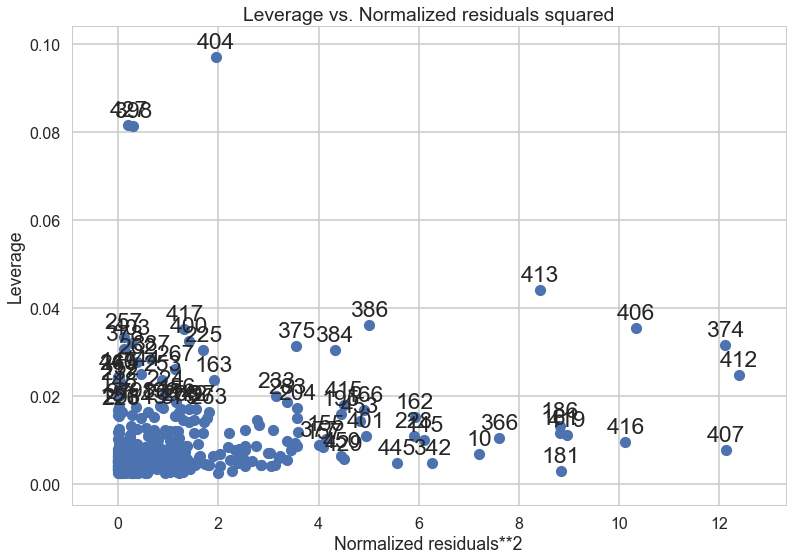

In [342]:
plot_leverage_resid2(threenewols)

The leverage and residuals now lack the outliers that were present before, though as outliers and high-leverage points are removed, the scale changes and new extremes appear. None of the remaining points originally stood out as out of the norm from the bulk of data in the presence of the original outliers and high-leverage points. A similar principle applies below in the influence plot with the outliers removed. Without those 13 outliers present, new points will obviously show relatively higher influence.

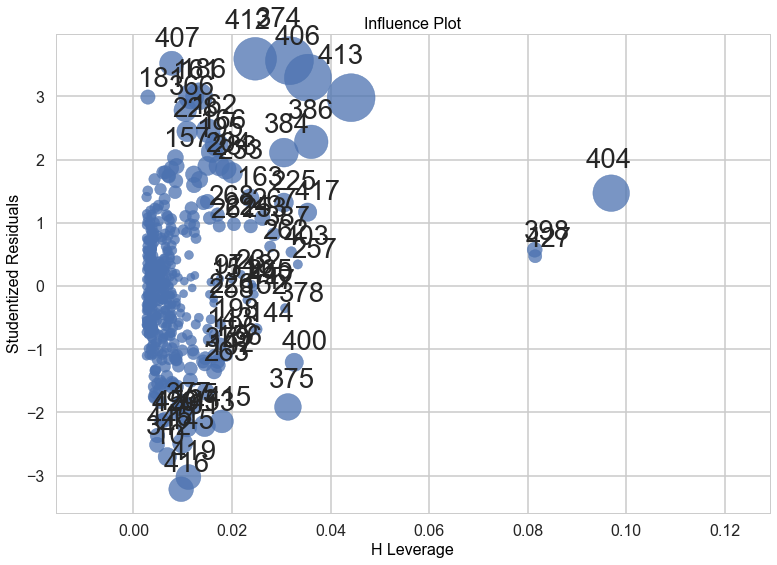

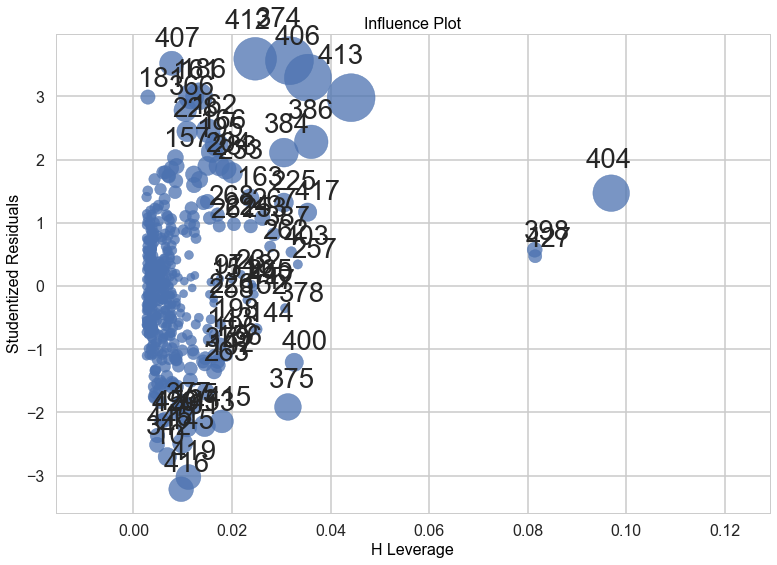

In [343]:
influence_plot(threenewols)